# Kodexempel för premium-API
Denna kodresurs använder sig av Jupyter notebooks, vilket du kan köra direkt i webbläsaren hos [Google Colab](https://colab.research.google.com/) ifall du har ett Google-konto. Om du kan installera saker på din dator är också [Anaconda + Jupyter](https://www.anaconda.com/products/distribution) ett bra val.

Nedan visas några exempel på hur du kan jobba med Webperfs API som premiumanvändare.

Har du inte premium? Du kan testköra API:t med följande API-nyckel _989089bfe899d6992ff320a97_, det är en demoanvändare för Webperf.se, site _3843_ när det behöver anges.

## 0. Hämta mitt site_id

Förutsätter:
* [requests](https://requests.readthedocs.io/en/latest/)
* [json](https://www.w3schools.com/python/python_json.asp)

In [1]:
import requests
import json

api_key = "989089bfe899d6992ff320a97" # "989089bfe899d6992ff320a97" är för demoanvändare för Webperf.se
headers = { "api_key" : api_key }

r = requests.get(f'https://api.webperf.se/stats/', headers=headers)
json_data = json.loads(r.text)

mitt_site_id = json_data[0]["site-ID"]
print(f'Mitt site-ID är: {mitt_site_id}')

Mitt site-ID är: 3843


## 1. Hämta era senaste resultat

Förutsätter:
* [requests](https://requests.readthedocs.io/en/latest/)
* [json](https://www.w3schools.com/python/python_json.asp)

In [2]:
import requests
import json

mitt_site_id = mitt_site_id # 3843 för demoanvändare för Webperf.se
api_key = "989089bfe899d6992ff320a97" # "989089bfe899d6992ff320a97" är för demoanvändare för Webperf.se
headers = { "api_key" : api_key }

r = requests.get(f'https://api.webperf.se/stats/{mitt_site_id}', headers=headers)

json_data_senaste_resultat = json.loads(r.text)

for metadata in json_data_senaste_resultat:
    if metadata != 'data':
        print(f'{metadata}: {json_data_senaste_resultat[metadata]}')

for rapport in json_data_senaste_resultat['data']:
    rapport_lista = dict(rapport)
    print(f"#################################\nTyp av test: {rapport_lista['type_of_test']}")
    print(f"Test kördes: {rapport_lista['test_date']}")
    print(f"Betyg: {rapport_lista['rating']} av 5")
    
    if len(rapport_lista['check_report']) > 0:
        print(f"\nRapport:\n{rapport_lista['check_report']}")
    if len(rapport_lista['check_report_a11y']) > 0:
        print(f"\nTillgänglighetsrapport:\n{rapport_lista['check_report_a11y']}")
    if len(rapport_lista['check_report_perf']) > 0:
        print(f"\nPrestandarapport:\n{rapport_lista['check_report_perf']}")
    if len(rapport_lista['check_report_sec']) > 0:
        print(f"\nSäkerhetsrapport:\n{rapport_lista['check_report_sec']}")
    if len(rapport_lista['check_report_stand']) > 0:
        print(f"\nRapport om webbstandard:\n{rapport_lista['check_report_stand']}")

api_version: 0.1
result_count: 16
timestamp: 2022-08-15 13:15:46.681192
uri: https://api.webperf.se/item/3843
#################################
Typ av test: 17
Test kördes: 2022-08-15 12:11:40
Betyg: 4.55 av 5

Rapport:
- Webbplatsen är bra.
 ( 4.55 betyg )
- Sidans storlek ( 4.60 betyg )
- Andelen resurser för sidan ( 4.70 betyg )
- Sidans DOM-komplexitet ( 5.00 betyg )
- Sidans Javascript-komplexitet ( 4.90 betyg )
- Sidans användning av dålig Javascript ( 5.00 betyg )
- Sidans användning av jQuery ( 3.50 betyg )
- Sidans CSS-komplexitet ( 4.25 betyg )
- Sidans användning av dålig CSS ( 3.70 betyg )
- Sidans användning av webbtypsnitt ( 3.15 betyg )
- Server konfiguration ( 4.45 betyg )


Prestandarapport:
- Användning av iframe ( 5.00 betyg )
- Exikveringstid för Javascript ( 5.00 betyg )
- DOM åtkomst ( 5.00 betyg )
- Händelser knutna till Scroll ( 4.30 betyg )
- document.write anrop ( 5.00 betyg )
- Synkrona Ajax anrop ( 5.00 betyg )
- Antal regler ( 4.05 betyg )
- Total vikt ( 5.

## 2. Hämta era historiska resultat

Förutsätter:
* [requests](https://requests.readthedocs.io/en/latest/)
* [json](https://www.w3schools.com/python/python_json.asp)

In [3]:
import requests
import json

mitt_site_id = mitt_site_id # 3843 för demoanvändare för Webperf.se
api_key = "989089bfe899d6992ff320a97" # "989089bfe899d6992ff320a97" är för demoanvändare för Webperf.se
headers = { "api_key" : api_key }

r = requests.get(f'https://api.webperf.se/stats_per_month/{mitt_site_id}', headers=headers)

json_data_historik = json.loads(r.text)

for metadata in json_data_historik:
    if metadata != 'data':
        print(f'{metadata}: {json_data_historik[metadata]}')

for rapport in json_data_historik['data']:
    rapport_lista = dict(rapport)
    
    print(f'{rapport_lista["timeperiod"]} var betyget {rapport_lista["score"]} i {rapport_lista["type_of_score"]}')
    

api_version: 0.1
result_count: 156
timestamp: 2022-08-15 13:15:47.000965
uri: https://api.webperf.se/item/3843
2022-03 var betyget 4.40 i kat-total
2022-03 var betyget 3.58 i kat-infosec
2022-03 var betyget 5.00 i kat-a11y
2022-03 var betyget 4.59 i kat-perf
2022-03 var betyget 4.98 i kat-webstandard
2022-02 var betyget 5.00 i kat-a11y
2022-02 var betyget 4.39 i kat-total
2022-02 var betyget 4.65 i kat-perf
2022-02 var betyget 4.95 i kat-webstandard
2022-02 var betyget 3.36 i kat-infosec
2022-01 var betyget 4.61 i kat-perf
2022-01 var betyget 4.28 i kat-total
2022-01 var betyget 5.00 i kat-a11y
2022-01 var betyget 2.10 i kat-infosec
2022-01 var betyget 4.92 i kat-webstandard
2021-12 var betyget 2.10 i kat-infosec
2021-12 var betyget 5.00 i kat-a11y
2021-12 var betyget 4.85 i kat-webstandard
2021-12 var betyget 2.74 i kat-perf
2021-12 var betyget 4.03 i kat-total
2021-11 var betyget 4.47 i kat-webstandard
2021-11 var betyget 2.10 i kat-infosec
2021-11 var betyget 2.84 i kat-perf
2021-11

## 2.1 Använd dina historiska resultat i pandas
Pandas är ett kraftfullt verktyg för att jobba med datakällor.

Förutsätter:
* [pandas](https://pandasguide.readthedocs.io/)

In [4]:
import pandas as pd
from pandas import json_normalize

df = json_normalize(json_data_historik['data']) 

print(df.head)
print(df)

<bound method NDFrame.head of     data_id score timeperiod    type_of_score
0    484825  4.40    2022-03        kat-total
1    474978  3.58    2022-03      kat-infosec
2    478122  5.00    2022-03         kat-a11y
3    471461  4.59    2022-03         kat-perf
4    481620  4.98    2022-03  kat-webstandard
..      ...   ...        ...              ...
151  121646  4.25    2019-08         kat-a11y
152  243880  4.05    2019-08  kat-webstandard
153   11426  3.86    2019-08         kat-perf
154  307924  3.72    2019-08        kat-total
155   62800  4.00    2019-08      kat-infosec

[156 rows x 4 columns]>
    data_id score timeperiod    type_of_score
0    484825  4.40    2022-03        kat-total
1    474978  3.58    2022-03      kat-infosec
2    478122  5.00    2022-03         kat-a11y
3    471461  4.59    2022-03         kat-perf
4    481620  4.98    2022-03  kat-webstandard
..      ...   ...        ...              ...
151  121646  4.25    2019-08         kat-a11y
152  243880  4.05    2019

## 2.2 Visualisera historiska resultat
Kör ovanstående kodcell (2.) först för att hämta din data från API:t.

Förutsätter:
* [pandas](https://pandasguide.readthedocs.io/)
* [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)

<AxesSubplot:>

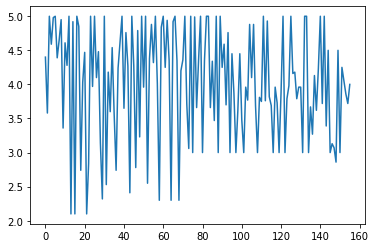

In [5]:
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt

plt.close("all")

df = json_normalize(json_data_historik['data'])

ts = pd.Series(df["score"].astype(float))
ts.plot()